In [1]:
# If running in Google Colab, mount drive
print('Check if running in Colab...')
try:
    from google.colab import drive
    print('Running in Colab!')
    drive.mount('/content/drive')
    %cd '/content/drive/My Drive/CIL-FS20'
except ImportError:
    print('Running locally!')

    #Check python version
    from platform import python_version
    print('Current python version: {}'.format(python_version()))

    # Check available GPUs
    import tensorflow as tf
    no_GPUs_available = len(tf.config.experimental.list_physical_devices('GPU'))
    print("Number of GPUs Available: {}".format(no_GPUs_available))

Check if running in Colab...
Running locally!
Current python version: 3.7.7
Number of GPUs Available: 0


In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose, UpSampling2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.merge import concatenate
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import MeanIoU
from keras import backend as K
from keras.backend import binary_crossentropy
import keras
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from datetime import datetime

from mask_to_submission import masks_to_submission
import util

## Install the following packages
import imageio
from PIL import Image
import cv2
import natsort

import post_processing as pp

Using TensorFlow backend.


## Constants

In [3]:
# Name of the current model
MODEL_NAME = 'fullyCNN_datagenerator_fixed_more_data_lr_reducing'
IMG_WIDTH = 608
IMG_HEIGHT = 608
EPOCHS = 100
STEPS_PER_EPOCH = 500
LEARNING_RATE = 0.0001
BATCH_SIZE = 8
rnd_seed = 4
np.random.seed(rnd_seed)

## Load Images

In [ ]:
training_image_dir = "training_images/images/"
training_label_dir = "training_images/groundtruth/"
test_image_dir = "test_images/normal/"
rotated_test_image_dir = "test_images/rotated/"

files_image = os.listdir(training_image_dir)
files_image = natsort.natsorted(files_image)
files_label = os.listdir(training_label_dir)
files_label = natsort.natsorted(files_label)
files_test = os.listdir(test_image_dir)
files_test = natsort.natsorted(files_test)
n = len(files_image)
n_test = len(files_test)


# Load list of numpy arrays of training images and labels
print("Loading " + str(n) + " training images")
training_image_list = []
training_label_list = []
for i in range(n):
    print("\tLoading training image {:04d}\r".format(i)),
    training_image_list.append(imageio.imread(training_image_dir + files_image[i], pilmode="RGB"))
    training_label_list.append(imageio.imread(training_label_dir + files_label[i], pilmode="L"))


# Load list of numpy arrays of test images
print("Loading " + str(n_test) + " test images")
test_image_list = pp.prepare_test_images(n_test, test_image_dir, files_test, rotated_test_image_dir)


print("TRAINING:")
print(training_image_list[0].shape)
print(training_label_list[0].shape)
print("TEST:")
print(test_image_list[0].shape)

Loading 2511 training images
	Loading training image 0000
	Loading training image 0001
	Loading training image 0002
	Loading training image 0003
	Loading training image 0004
	Loading training image 0005
	Loading training image 0006
	Loading training image 0007
	Loading training image 0008
	Loading training image 0009
	Loading training image 0010
	Loading training image 0011
	Loading training image 0012
	Loading training image 0013
	Loading training image 0014
	Loading training image 0015
	Loading training image 0016
	Loading training image 0017
	Loading training image 0018
	Loading training image 0019
	Loading training image 0020
	Loading training image 0021
	Loading training image 0022
	Loading training image 0023
	Loading training image 0024
	Loading training image 0025
	Loading training image 0026
	Loading training image 0027
	Loading training image 0028
	Loading training image 0029
	Loading training image 0030
	Loading training image 0031
	Loading training image 0032
	Loading train

	Loading training image 0292
	Loading training image 0293
	Loading training image 0294
	Loading training image 0295
	Loading training image 0296
	Loading training image 0297
	Loading training image 0298
	Loading training image 0299
	Loading training image 0300
	Loading training image 0301
	Loading training image 0302
	Loading training image 0303
	Loading training image 0304
	Loading training image 0305
	Loading training image 0306
	Loading training image 0307
	Loading training image 0308
	Loading training image 0309
	Loading training image 0310
	Loading training image 0311
	Loading training image 0312
	Loading training image 0313
	Loading training image 0314
	Loading training image 0315
	Loading training image 0316
	Loading training image 0317
	Loading training image 0318
	Loading training image 0319
	Loading training image 0320
	Loading training image 0321
	Loading training image 0322
	Loading training image 0323
	Loading training image 0324
	Loading training image 0325
	Loading train

	Loading training image 0591
	Loading training image 0592
	Loading training image 0593
	Loading training image 0594
	Loading training image 0595
	Loading training image 0596
	Loading training image 0597
	Loading training image 0598
	Loading training image 0599
	Loading training image 0600
	Loading training image 0601
	Loading training image 0602
	Loading training image 0603
	Loading training image 0604
	Loading training image 0605
	Loading training image 0606
	Loading training image 0607
	Loading training image 0608
	Loading training image 0609
	Loading training image 0610
	Loading training image 0611
	Loading training image 0612
	Loading training image 0613
	Loading training image 0614
	Loading training image 0615
	Loading training image 0616
	Loading training image 0617
	Loading training image 0618
	Loading training image 0619
	Loading training image 0620
	Loading training image 0621
	Loading training image 0622
	Loading training image 0623
	Loading training image 0624
	Loading train

	Loading training image 1157
	Loading training image 1158
	Loading training image 1159
	Loading training image 1160
	Loading training image 1161
	Loading training image 1162
	Loading training image 1163
	Loading training image 1164
	Loading training image 1165
	Loading training image 1166
	Loading training image 1167
	Loading training image 1168
	Loading training image 1169
	Loading training image 1170
	Loading training image 1171
	Loading training image 1172
	Loading training image 1173
	Loading training image 1174
	Loading training image 1175
	Loading training image 1176
	Loading training image 1177
	Loading training image 1178
	Loading training image 1179
	Loading training image 1180
	Loading training image 1181
	Loading training image 1182
	Loading training image 1183
	Loading training image 1184
	Loading training image 1185
	Loading training image 1186
	Loading training image 1187
	Loading training image 1188
	Loading training image 1189
	Loading training image 1190
	Loading train

	Loading training image 1452
	Loading training image 1453
	Loading training image 1454
	Loading training image 1455
	Loading training image 1456
	Loading training image 1457
	Loading training image 1458
	Loading training image 1459
	Loading training image 1460
	Loading training image 1461
	Loading training image 1462
	Loading training image 1463
	Loading training image 1464
	Loading training image 1465
	Loading training image 1466
	Loading training image 1467
	Loading training image 1468
	Loading training image 1469
	Loading training image 1470
	Loading training image 1471
	Loading training image 1472
	Loading training image 1473
	Loading training image 1474
	Loading training image 1475
	Loading training image 1476
	Loading training image 1477
	Loading training image 1478
	Loading training image 1479
	Loading training image 1480
	Loading training image 1481
	Loading training image 1482
	Loading training image 1483
	Loading training image 1484
	Loading training image 1485
	Loading train

	Loading training image 1748
	Loading training image 1749
	Loading training image 1750
	Loading training image 1751
	Loading training image 1752
	Loading training image 1753
	Loading training image 1754
	Loading training image 1755
	Loading training image 1756
	Loading training image 1757
	Loading training image 1758
	Loading training image 1759
	Loading training image 1760
	Loading training image 1761
	Loading training image 1762
	Loading training image 1763
	Loading training image 1764
	Loading training image 1765
	Loading training image 1766
	Loading training image 1767
	Loading training image 1768
	Loading training image 1769
	Loading training image 1770
	Loading training image 1771
	Loading training image 1772
	Loading training image 1773
	Loading training image 1774
	Loading training image 1775
	Loading training image 1776
	Loading training image 1777
	Loading training image 1778
	Loading training image 1779
	Loading training image 1780
	Loading training image 1781
	Loading train

	Loading training image 2038
	Loading training image 2039
	Loading training image 2040
	Loading training image 2041
	Loading training image 2042
	Loading training image 2043
	Loading training image 2044
	Loading training image 2045
	Loading training image 2046
	Loading training image 2047
	Loading training image 2048
	Loading training image 2049
	Loading training image 2050
	Loading training image 2051
	Loading training image 2052
	Loading training image 2053
	Loading training image 2054
	Loading training image 2055
	Loading training image 2056
	Loading training image 2057
	Loading training image 2058
	Loading training image 2059
	Loading training image 2060
	Loading training image 2061
	Loading training image 2062
	Loading training image 2063
	Loading training image 2064
	Loading training image 2065
	Loading training image 2066
	Loading training image 2067
	Loading training image 2068
	Loading training image 2069
	Loading training image 2070
	Loading training image 2071
	Loading train

	Loading training image 2326
	Loading training image 2327
	Loading training image 2328
	Loading training image 2329
	Loading training image 2330
	Loading training image 2331
	Loading training image 2332
	Loading training image 2333
	Loading training image 2334
	Loading training image 2335
	Loading training image 2336
	Loading training image 2337
	Loading training image 2338
	Loading training image 2339
	Loading training image 2340
	Loading training image 2341
	Loading training image 2342
	Loading training image 2343
	Loading training image 2344
	Loading training image 2345
	Loading training image 2346
	Loading training image 2347
	Loading training image 2348
	Loading training image 2349
	Loading training image 2350
	Loading training image 2351
	Loading training image 2352
	Loading training image 2353
	Loading training image 2354
	Loading training image 2355
	Loading training image 2356
	Loading training image 2357
	Loading training image 2358
	Loading training image 2359
	Loading train

## Padd Images
Training images have size 400x400 and test images have size 608x608. So we need to pad training images to same size, 
for that I use mirror padding for now.

In [ ]:
# Mirror padd all training images to get same size as test images
training_image_padded_list = []
training_label_padded_list = []
for i in range(n):
    training_image = training_image_list[i]
    training_label = training_label_list[i]
    height, width, _ = training_image.shape
    pad_y = int((IMG_HEIGHT - height) / 2)
    pad_x = int((IMG_WIDTH - height) / 2)
    training_image_padded_list.append(cv2.copyMakeBorder(training_image,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))
    training_label_padded_list.append(cv2.copyMakeBorder(training_label,pad_y,pad_y,pad_x,pad_x,cv2.BORDER_REFLECT))

# Plot random Sample of images
index = random.randint(0, n-1)
num_samples = 5

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*4, 4):
  index = random.randint(0, n-1)

  f.add_subplot(num_samples, 4, i)
  plt.imshow(training_image_list[index])
  plt.title("Original Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+1)
  plt.imshow(training_image_padded_list[index])
  plt.title("Padded Image")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+2)
  plt.imshow(np.squeeze(training_label_list[index]))
  plt.title("Original Label")
  plt.axis('off')

  f.add_subplot(num_samples, 4, i+3)
  plt.imshow(np.squeeze(training_label_padded_list[index]))
  plt.title("Padded Label")
  plt.axis('off')

plt.show()

# Convert image lists to numpy arrays for further processing
training_image = np.array(training_image_padded_list)
training_label = np.expand_dims(np.array(training_label_padded_list), -1)
test_image = np.array(test_image_list)
print(training_image.shape)
print(training_label.shape)

# Delete unused variables, hopefully this frees up some RAM
del training_image_list
del training_label_list
del training_image_padded_list
del training_label_padded_list

In [ ]:
# Make sure label masks only have values 1 or zero
#thresh_val = 0.5
#training_label = (training_label > thresh_val).astype(np.uint8)
#training_label = training_label/255
training_label = training_label.astype(np.float32)
#print(np.unique(training_label, return_counts=True, axis=None))
print(training_label.dtype)

# Get a validation set
training_image, validation_image, training_label, validation_label = train_test_split(
    training_image, training_label, test_size=0.1, random_state=rnd_seed)

# Rescale validation images/labels and test images because generator will do the same with training data
validation_image = validation_image/255.0
validation_label = validation_label/255.0
validation_image = validation_image.astype(np.float32)
validation_label = validation_label.astype(np.float32)
print(validation_image.dtype)
test_image = test_image/255.0
test_image = test_image.astype(np.float32)
print(test_image.dtype)

## Augment Training Data

We use the Keras Data Generator to augment our training data online while training. This is necessary because of memory consumption.

In [ ]:
# We create an instance for the training images, training labels and test images
data_gen_args = dict(rescale=1.0/255.0,
                     #rotation_range=360,
                     #width_shift_range=0.05,
                     #height_shift_range=0.05,
                     #zoom_range=0.05,
                     #shear_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1
image_generator = image_datagen.flow(
    training_image,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/images/",
    #save_prefix="",
    #save_format="png",
    seed=seed)
mask_generator = mask_datagen.flow(
    training_label,
    batch_size=BATCH_SIZE,
    #save_to_dir="training_images_augmented/groundtruth/",
    #save_prefix="",
    #save_format="png",
    seed=seed)

# Combine generators into one which yields image and masks
train_generator = zip(image_generator, mask_generator)

## Loss Function and Accuracy Metric
- Accuracy: Intersection of prediction to label image over Union
- Loss :
    - Dice Coef Loss (https://arxiv.org/pdf/1606.04797v1.pdf)
    - Soft Dice Loss (Measure of interleaving of prediction image and label image)
    - Jaccard Distance

Source: https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99

In [ ]:
from keras import backend as K

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

def soft_dice_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def soft_dice_loss(y_true, y_pred):
    return 1-soft_dice_coef(y_true, y_pred)

def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

def jaccard_coef(y_true, y_pred, smooth = 1e-12):
    intersection = K.sum(y_true * y_pred, axis=[0, 1, 2])
    sum_ = K.sum(y_true + y_pred, axis=[0, 1, 2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)

def combined_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)

## Model: Fully CNN built in Keras

In [9]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, 3))

conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (inputs)
conv1 = BatchNormalization() (conv1)
conv1 = Dropout(0.1) (conv1)
conv1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv1)
conv1 = BatchNormalization() (conv1)
pooling1 = MaxPooling2D((2, 2)) (conv1)

conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling1)
conv2 = BatchNormalization() (conv2)
conv2 = Dropout(0.1) (conv2)
conv2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv2)
conv2 = BatchNormalization() (conv2)
pooling2 = MaxPooling2D((2, 2)) (conv2)

conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling2)
conv3 = BatchNormalization() (conv3)
conv3 = Dropout(0.2) (conv3)
conv3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv3)
conv3 = BatchNormalization() (conv3)
pooling3 = MaxPooling2D((2, 2)) (conv3)

conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling3)
conv4 = BatchNormalization() (conv4)
conv4 = Dropout(0.2) (conv4)
conv4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv4)
conv4 = BatchNormalization() (conv4)
pooling4 = MaxPooling2D(pool_size=(2, 2)) (conv4)

conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (pooling4)
conv5 = BatchNormalization() (conv5)
conv5 = Dropout(0.3) (conv5)
conv5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv5)
conv5 = BatchNormalization() (conv5)


upsample6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv5)
upsample6 = concatenate([upsample6, conv4])
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample6)
conv6 = BatchNormalization() (conv6)
conv6 = Dropout(0.2) (conv6)
conv6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv6)
conv6 = BatchNormalization() (conv6)

upsample7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv6)
upsample7 = concatenate([upsample7, conv3])
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample7)
conv7 = BatchNormalization() (conv7)
conv7 = Dropout(0.2) (conv7)
conv7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv7)
conv7 = BatchNormalization() (conv7)

upsample8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (conv7)
upsample8 = concatenate([upsample8, conv2])
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample8)
conv8 = BatchNormalization() (conv8)
conv8 = Dropout(0.1) (conv8)
conv8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv8)
conv8 = BatchNormalization() (conv8)

upsample9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (conv8)
upsample9 = concatenate([upsample9, conv1], axis=3)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (upsample9)
conv9 = BatchNormalization() (conv9)
conv9 = Dropout(0.1) (conv9)
conv9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (conv9)
conv9 = BatchNormalization() (conv9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (conv9)

model = Model(inputs=[inputs], outputs=[outputs])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 608, 608, 16) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## Callbacks for Observations

In [10]:
#tbc=TensorBoardColab()
model_path = "./Models/{}_model.h5".format(MODEL_NAME)
checkpointer = ModelCheckpoint(model_path,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
csv_logger = CSVLogger("./Logs/{}_log.csv".format(MODEL_NAME), separator=',', append=False)
lr_reducer = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=3,
                               verbose=1,
                               epsilon=1e-4)
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

/home/rmenta/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


## Model Training

In [11]:
opt = keras.optimizers.adam(LEARNING_RATE)
#opt = keras.optimizers.Nadam(lr=LEARNING_RATE)
model.compile(
      optimizer=opt,
      loss=dice_coef_loss,
      metrics=[iou_coef])

In [12]:
history = model.fit_generator(train_generator,
                              validation_data =(validation_image, validation_label),
                              steps_per_epoch=STEPS_PER_EPOCH,
                              epochs=EPOCHS,
                              callbacks = [checkpointer, csv_logger, lr_reducer, early_stopper])

Epoch 1/100
500/500 [==============================] - 399s 798ms/step - loss: 0.0832 - iou_coef: 0.2295 - val_loss: 0.0324 - val_iou_coef: 0.3107

Epoch 00001: val_loss improved from inf to 0.03244, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_lr_reducing_model.h5
Epoch 2/100
500/500 [==============================] - 388s 775ms/step - loss: 0.0396 - iou_coef: 0.3104 - val_loss: 0.0242 - val_iou_coef: 0.3647

Epoch 00002: val_loss improved from 0.03244 to 0.02418, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_lr_reducing_model.h5
Epoch 3/100
500/500 [==============================] - 388s 775ms/step - loss: 0.0288 - iou_coef: 0.3590 - val_loss: 0.0233 - val_iou_coef: 0.3651

Epoch 00003: val_loss improved from 0.02418 to 0.02335, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_lr_reducing_model.h5
Epoch 4/100
500/500 [==============================] - 388s 776ms/step - loss: 0.0241 - iou_coef: 0.3856 - val_loss: 0.0199 - val_iou_coe

Epoch 32/100
500/500 [==============================] - 416s 831ms/step - loss: 0.0135 - iou_coef: 0.5560 - val_loss: 0.0131 - val_iou_coef: 0.5442

Epoch 00032: val_loss did not improve from 0.01302
Epoch 33/100
500/500 [==============================] - 416s 832ms/step - loss: 0.0138 - iou_coef: 0.5540 - val_loss: 0.0130 - val_iou_coef: 0.5481

Epoch 00033: val_loss did not improve from 0.01302

Epoch 00033: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.
Epoch 34/100
500/500 [==============================] - 416s 832ms/step - loss: 0.0135 - iou_coef: 0.5512 - val_loss: 0.0130 - val_iou_coef: 0.5474

Epoch 00034: val_loss improved from 0.01302 to 0.01302, saving model to ./Models/fullyCNN_datagenerator_fixed_more_data_lr_reducing_model.h5
Epoch 35/100
500/500 [==============================] - 416s 833ms/step - loss: 0.0137 - iou_coef: 0.5544 - val_loss: 0.0131 - val_iou_coef: 0.5463

Epoch 00035: val_loss did not improve from 0.01302
Epoch 36/100
500/500 [=======

KeyboardInterrupt: 

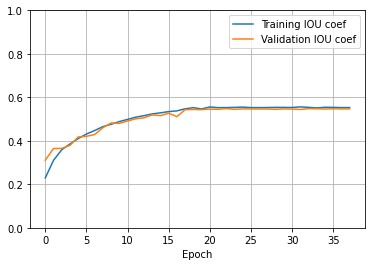

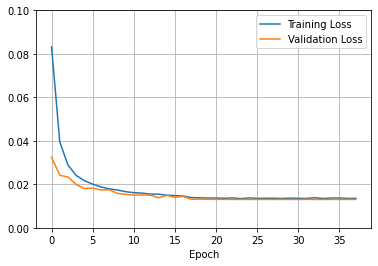

In [18]:
# Show a training report
training_info = pd.read_csv('./Logs/{}_log.csv'.format(MODEL_NAME), header=0)

acc1, = plt.plot(training_info['epoch'], training_info['iou_coef'])
acc2, = plt.plot(training_info['epoch'], training_info['val_iou_coef'])
plt.legend([acc1, acc2], ['Training IOU coef', 'Validation IOU coef'])
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.grid(True)
plt.show()

loss1, = plt.plot(training_info['epoch'], training_info['loss'])
loss2, = plt.plot(training_info['epoch'], training_info['val_loss'])
plt.legend([acc1, acc2], ['Training Loss', 'Validation Loss'])                            
plt.xlabel('Epoch')
plt.ylim(0,0.1)
plt.grid(True)

plt.show()

## Model Evaluation

In [9]:
# Kaggle scores on validation images (mean score per image and overall mean score)
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
y_pred = model.predict(validation_image, batch_size=4, verbose=1)
scores = util.validate_kaggle_score(validation_label, y_pred)
print(scores)
print(sum(scores)/len(scores))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


252/252 [==============================] - 318s 1s/step
[0.48648648648648646, 0.8720379146919431, 0.0, 0.7058823529411764, 0.9647887323943661, 0.1923076923076923, 0.9176470588235294, 0.8596491228070176, 0.8588235294117647, 0.5846153846153846, 0.8633540372670808, 0.9464285714285715, 0.9102244389027431, 0.8661417322834646, 0.894484412470024, 0.9050279329608938, 0.5797101449275363, 0.8536312849162011, 0.8260869565217391, 0.9608938547486034, 0.9, 0.38095238095238093, 0.7826086956521738, 0.6697459584295612, 0.8682170542635658, 0.8595041322314049, 0.6729857819905214, 0.9141193595342068, 0.8761609907120742, 0.8942598187311179, 0.7832699619771863, 0.9801324503311258, 0.8995215311004785, 0.9246231155778895, 0.9166666666666667, 0.9537892791127541, 0.48148148148148145, 0.38683127572016457, 0.7673267326732673, 0.6175637393767706, 0.896551724137931, 0.776255707762557, 0.8228571428571428, 0.25, 0.5894736842105264, 0.9

In [10]:
model = load_model("./Models/{}_model.h5".format(MODEL_NAME), custom_objects={'dice_coef_loss': dice_coef_loss, 'iou_coef': iou_coef})
#model.evaluate(test_images, test_label)
predictions = model.predict(test_image, batch_size=4, verbose=1) # shape: (752, 608, 608, 1)

752/752 [==============================] - 822s 1s/step


In [13]:

MODE = 'only90_max'
RESULT_DIR = 'test_images/post_processed/'

# combine all 8 predicted Images with MODE and save to RESULT_DIR
pp.combine_and_save(MODE, RESULT_DIR, predictions, files_test)


KeyboardInterrupt: 

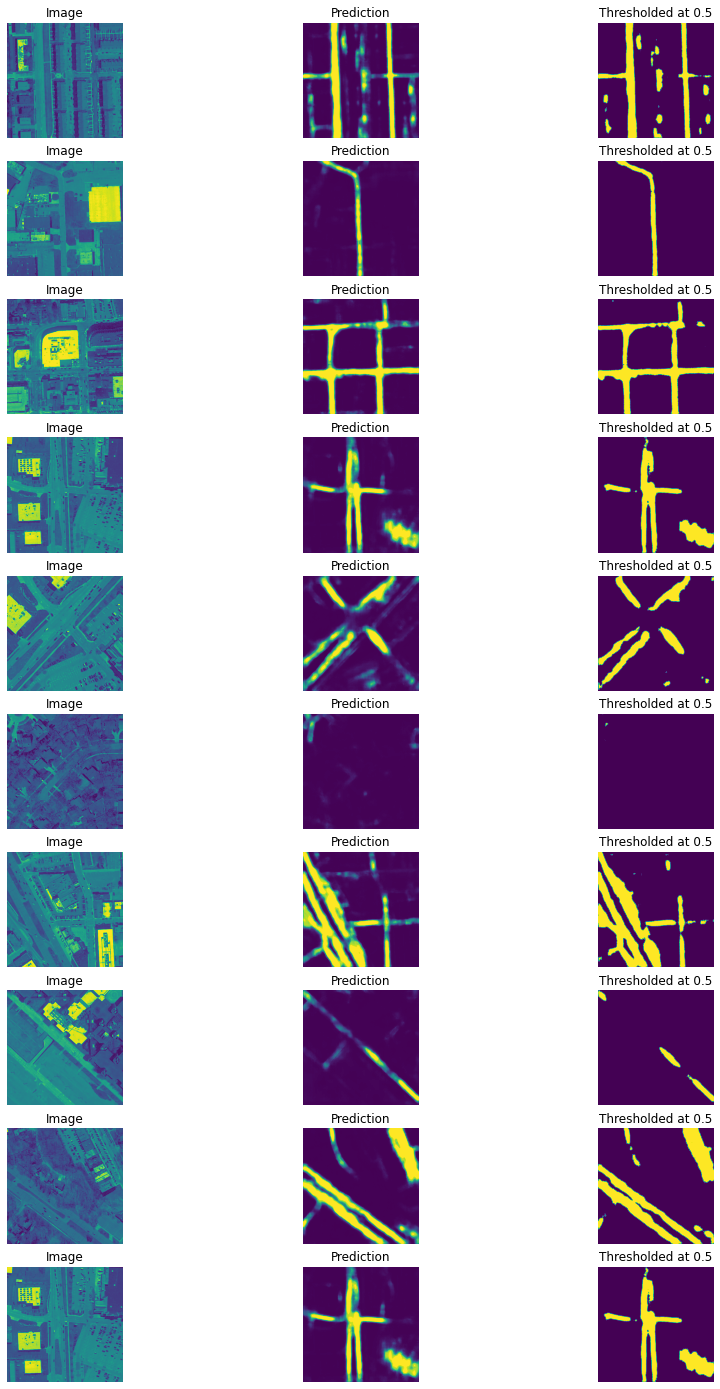

In [16]:
thresh_val = 0.5
predicton_threshold = (predictions > thresh_val).astype(np.uint8)


index = random.randint(0, len(predictions)-1)
num_samples = 10

f = plt.figure(figsize = (15, 25))
for i in range(1, num_samples*3, 3):
  index = random.randint(0, len(predictions)-1)

  f.add_subplot(num_samples, 3, i)
  plt.imshow(test_image[index][:,:,0])
  plt.title("Image")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+1)
  plt.imshow(np.squeeze(predictions[index][:,:,0]))
  plt.title("Prediction")
  plt.axis('off')

  f.add_subplot(num_samples, 3, i+2)
  plt.imshow(np.squeeze(predicton_threshold[index][:,:,0]))
  plt.title("Thresholded at {}".format(thresh_val))
  plt.axis('off')

plt.show()

## Create Submission File
Multiply image by 255 and convert to unit8 before storing s.t. it gets read out correctly by mask_to_submission!

In [110]:
# predictions = new_predictions
# predictions = np.squeeze(predictions*255)
# predictions = predictions.astype(np.uint8)

# result_dir = './Results/Prediction_Images/{}/'.format(MODEL_NAME)
# os.makedirs(result_dir, exist_ok=True)

#print(predictions.shape)
#[print(predictions[i].shape) for i in range(n_test)]

# [imageio.imwrite(result_dir + files_test[i], new_predictions[i],) for i in range(n_test)]
# result_dir = './test_images/averaged/'
files_predictions = os.listdir(RESULT_DIR)
files_predictions = [RESULT_DIR + files_predictions[i] for i in range(n_test)]
masks_to_submission('./Results/Submissions/{}.csv'.format(MODEL_NAME + '-' + MODE), *files_predictions)
print('Submission ready')

test_images/post_processed/test_10.png
test_images/post_processed/test_105.png
test_images/post_processed/test_106.png
test_images/post_processed/test_107.png
test_images/post_processed/test_108.png
test_images/post_processed/test_11.png
test_images/post_processed/test_115.png
test_images/post_processed/test_116.png
test_images/post_processed/test_12.png
test_images/post_processed/test_121.png
test_images/post_processed/test_122.png
test_images/post_processed/test_123.png
test_images/post_processed/test_124.png
test_images/post_processed/test_128.png
test_images/post_processed/test_129.png
test_images/post_processed/test_130.png
test_images/post_processed/test_131.png
test_images/post_processed/test_136.png
test_images/post_processed/test_137.png
test_images/post_processed/test_138.png
test_images/post_processed/test_139.png
test_images/post_processed/test_14.png
test_images/post_processed/test_140.png
test_images/post_processed/test_142.png
test_images/post_processed/test_143.png
test